# 中国人寿保险预测

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split

## 导入数据

In [16]:
data = pd.read_excel(r"E:\文档库\ML赛题\中国人寿保费\中国人寿.xlsx")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 数据评估

<Axes: xlabel='charges', ylabel='Density'>

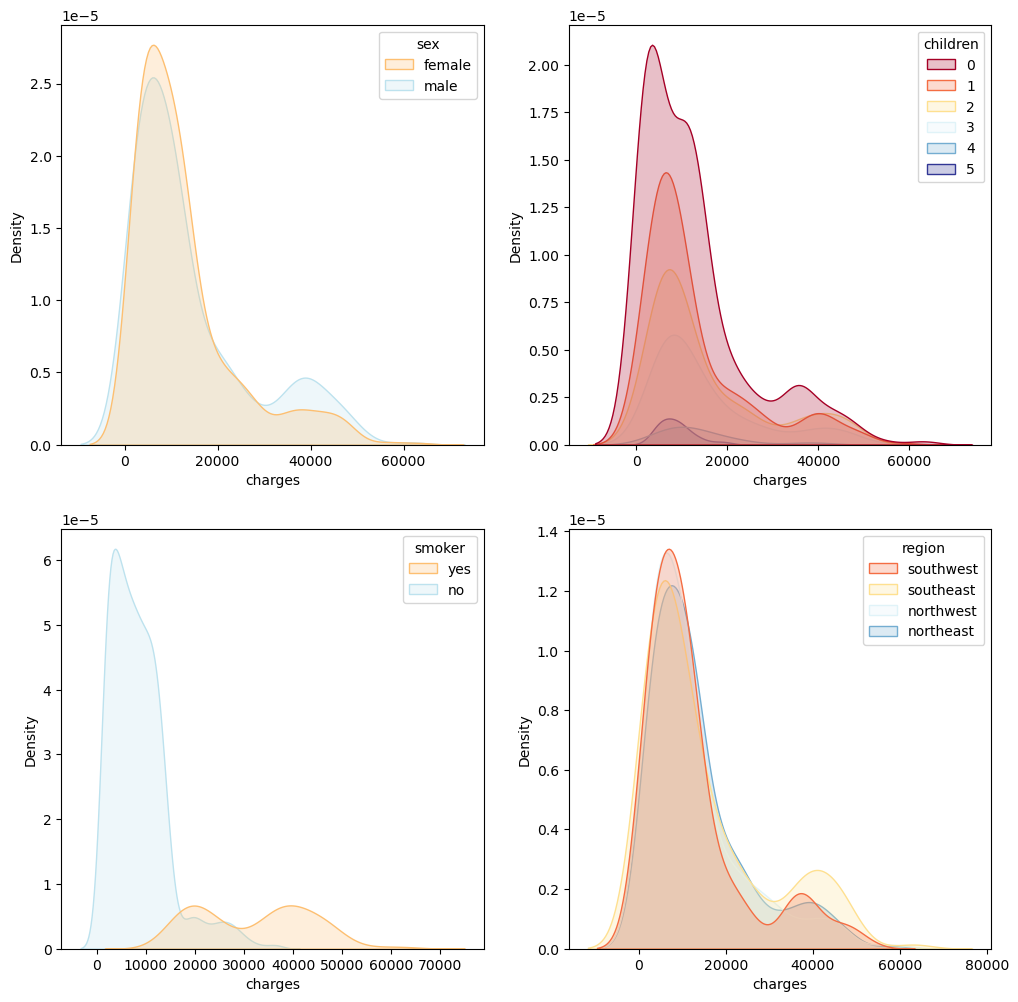

In [21]:
#概率密度曲线
fig, ax = plt.subplots(2,2, figsize = (12,12))

#性别对保险费的影响
sns.kdeplot(
    data,
    x = 'charges',
    hue = 'sex',
    fill = True,
    palette = 'RdYlBu',
    ax = ax[0][0] 
)
#孩子对保险费的影响
sns.kdeplot(
    data,
    x = 'charges',
    hue = 'children',
    fill = True,
    palette = 'RdYlBu',
    ax = ax[0][1] 
)
#吸烟对保险费的影响
sns.kdeplot(
    data,
    x = 'charges',
    hue = 'smoker',
    fill = True,
    palette = 'RdYlBu',
    ax = ax[1][0] 
)
#地区对保险费影响
sns.kdeplot(
    data,
    x = 'charges',
    hue = 'region',
    fill = True,
    palette = 'RdYlBu',
    ax = ax[1][1] 
)

#可以看出性别和地区对保险费用没有影响

<Axes: xlabel='bmi', ylabel='charges'>

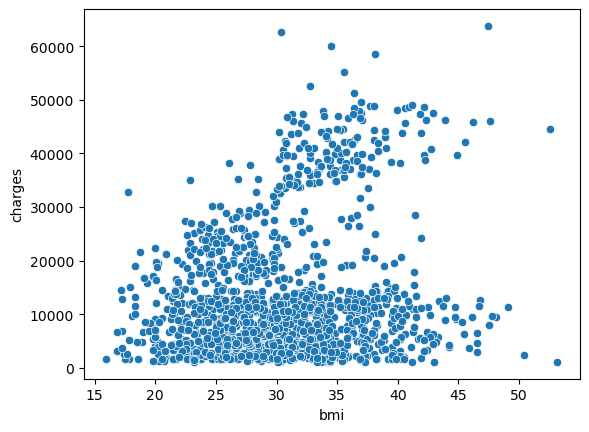

In [25]:
sns.scatterplot(
    x = data['bmi'],
    y = data['charges']
)

## 特征工程

In [22]:
#删除无用特征
new_data = data.drop(columns = ['sex', 'region'])
new_data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [26]:
#对连续数据离散化
new_data['smoker'] = new_data['smoker'].apply(lambda x:0 if x == 'no' else 1)
new_data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [36]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]
y = y.to_numpy().reshape(-1,1)
y.shape

(1338, 1)

In [40]:
#拆分数据集
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

## 标准化数据

In [43]:
#标准化
standar = StandardScaler()
x_train_norm = standar.fit_transform(x_train)
y_train_norm = standar.fit_transform(y_train) 
x_test_norm = standar.fit_transform(x_test)
y_test_norm = standar.fit_transform(y_test)

## 普通线性回归

In [44]:
#训练
LR = LinearRegression()
LR.fit(x_train_norm, y_train_norm)

#预测
y_test_norm_pred = LR.predict(x_test_norm)

#计算mae
display(f"model mean absolute error:{mean_absolute_error(y_pred = y_test_norm_pred, y_true = y_test_norm)}")

'model mean absolute error:0.32827248266438613'

In [45]:
#非标准化
LR = LinearRegression()
LR.fit(x_train,y_train)

#预测
y_test_pred = LR.predict(x_test)

#计算mae
display(f"model mean absolute error:{mean_absolute_error(y_pred = y_test_pred, y_true = y_test)}")

'model mean absolute error:4029.226889345601'

## 随机梯度下降

In [47]:
#训练
sgd = SGDRegressor()
sgd.fit(x_train_norm, y_train_norm.ravel())

#预测
y_test_norm_pred = sgd.predict(x_test_norm)

#计算mae
display(f"model mean absolute error:{mean_absolute_error(y_pred = y_test_norm_pred, y_true = y_test_norm)}")

'model mean absolute error:0.32744731616774353'

## 岭回归

In [89]:
#不标准化+岭回归
rdg = Ridge(alpha = 1)
rdg.fit(x_train, y_train)

#预测
y_test_pred = rdg.predict(x_test)

#计算mae
display(f"model Ridge mean absolute error:{mean_absolute_error(y_pred = y_test_pred, y_true = y_test)}")

'model Ridge mean absolute error:4038.254402677541'

In [118]:
#标准化+岭回归
rdg = Ridge(alpha = 0.1)
rdg.fit(x_train_norm, y_train_norm)

#预测
y_test_norm_pred = rdg.predict(x_test_norm)

#计算mae
display(f"model Ridge mean absolute error:{mean_absolute_error(y_pred = y_test_norm_pred, y_true = y_test_norm)}")

'model Ridge mean absolute error:0.3282793724032479'

## 套索回归

In [120]:
#标准化+lasso回归
lso = Lasso(alpha = 0.1)
lso.fit(x_train_norm, y_train_norm)

#预测
y_test_norm_pred = lso.predict(x_test_norm)

#计算mae
display(f"model lasso mean absolute error:{mean_absolute_error(y_pred = y_test_norm_pred, y_true = y_test_norm)}")

'model lasso mean absolute error:0.3543138729535145'

## 弹性网络

In [132]:
#标准化+弹性网络
elt = ElasticNet(alpha = 0.01, l1_ratio = 1)
elt.fit(x_train_norm, y_train_norm)

#预测
y_test_norm_pred = elt.predict(x_test_norm)

#计算mae
display(f"model Ridge mean absolute error:{mean_absolute_error(y_pred = y_test_norm_pred, y_true = y_test_norm)}")

'model Ridge mean absolute error:0.32807379313003837'

## 数据升维

In [111]:
#数据升维
poly = PolynomialFeatures(degree = 2, interaction_only = False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#标准化
x_train_poly_norm = standar.fit_transform(x_train_poly)
x_test_poly_norm = standar.fit_transform(x_test_poly)
y_train_norm = standar.fit_transform(y_train)
y_test_norm = standar.fit_transform(y_test)

## 多项式 + 普通线性回归

In [112]:
#-普通线性回归
LR = LinearRegression()
LR.fit(x_train_poly_norm,y_train_norm)

#预测
y_test_poly_norm_pred = LR.predict(x_test_poly_norm)

#计算mae
display(f"model Linear mean absolute error:{mean_absolute_error(y_pred = y_test_poly_norm_pred, y_true = y_test_norm)}")

'model Linear mean absolute error:0.20234309958881275'

## 多项式 + 岭回归 

In [135]:
#标准化+岭回归
rdg = Ridge(alpha = 0.01)
rdg.fit(x_train_poly_norm, y_train_norm)

#预测
y_test_poly_norm_pred = rdg.predict(x_test_poly_norm)

#计算mae
display(f"model Ridge mean absolute error:{mean_absolute_error(y_pred = y_test_poly_norm_pred, y_true = y_test_norm)}")

'model Ridge mean absolute error:0.20234361253708458'

## 多项式 + 弹性网络

In [150]:
#标准化+弹性网络
elt = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 5000)
elt.fit(x_train_poly_norm, y_train_norm)

#预测
y_test_poly_norm_pred = elt.predict(x_test_poly_norm)

#计算mae
display(f"model Ridge mean absolute error:{mean_absolute_error(y_pred = y_test_poly_norm_pred, y_true = y_test_norm)}")

'model Ridge mean absolute error:0.2017765929337872'